<a href="https://colab.research.google.com/github/SinhaAmrit/Round-Table-AI/blob/ML-Integration/notebooks/toxic-comments-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toxic Comments Classification

## Installing Dependencies and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
import pickle

In [2]:
train_url = 'https://raw.githubusercontent.com/SinhaAmrit/Round-Table-AI/ML-Integration/data/comment-data/train.csv'
test_url = 'https://raw.githubusercontent.com/SinhaAmrit/Round-Table-AI/ML-Integration/data/comment-data/test.csv'
df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [4]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

## Preprocessing

In [6]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [7]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [8]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [9]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [10]:
MAX_FEATURES = 200000
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')
vectorizer.adapt(X.values)
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [11]:
vectorized_text = vectorizer(X.values)
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [12]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

train = dataset.take(int(len(dataset)*0.7))
val = dataset.skip(int(len(dataset)*0.7)).take(int(len(dataset)*0.2))
test = dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*0.1))
len(train),len(val),len(test)

(6981, 1994, 997)

In [13]:
train.as_numpy_iterator().next()

(array([[     2,    228,    538, ...,      0,      0,      0],
        [    46,     33,     15, ...,      0,      0,      0],
        [   607, 119266,   4917, ...,      0,      0,      0],
        ...,
        [    46,    175,     36, ...,      0,      0,      0],
        [    23,      7,    105, ...,      0,      0,      0],
        [   316,   1219,    157, ...,      0,      0,      0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

## Building the Deep Neural Network

In [14]:
model = Sequential([
    # Embedding Layer
    tf.keras.layers.Embedding(MAX_FEATURES+1,32),
    # Bidirectional LSTM Layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='tanh')),
    # Hidden Layer for feature extraction
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    # Final Layer
    tf.keras.layers.Dense(6,activation='sigmoid')
])
model.compile(loss='BinaryCrossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [15]:
history = model.fit(train, epochs=10, validation_data = val)

Epoch 1/10
6981/6981 [==============================] - 810s 114ms/step - loss: 0.0631 - accuracy: 0.9777 - val_loss: 0.0471 - val_accuracy: 0.9885
Epoch 2/10
6981/6981 [==============================] - 673s 96ms/step - loss: 0.0465 - accuracy: 0.9905 - val_loss: 0.0407 - val_accuracy: 0.9937
Epoch 3/10
6981/6981 [==============================] - 665s 95ms/step - loss: 0.0411 - accuracy: 0.9915 - val_loss: 0.0373 - val_accuracy: 0.9941
Epoch 4/10
6981/6981 [==============================] - 671s 96ms/step - loss: 0.0357 - accuracy: 0.9936 - val_loss: 0.0314 - val_accuracy: 0.9938
Epoch 5/10
6981/6981 [==============================] - 668s 96ms/step - loss: 0.0326 - accuracy: 0.9940 - val_loss: 0.0324 - val_accuracy: 0.9942
Epoch 6/10
6981/6981 [==============================] - 666s 95ms/step - loss: 0.0296 - accuracy: 0.9935 - val_loss: 0.0252 - val_accuracy: 0.9944
Epoch 7/10
6981/6981 [==============================] - 669s 96ms/step - loss: 0.0266 - accuracy: 0.9900 - val_loss: 

### Ploting Accuracy and Loss

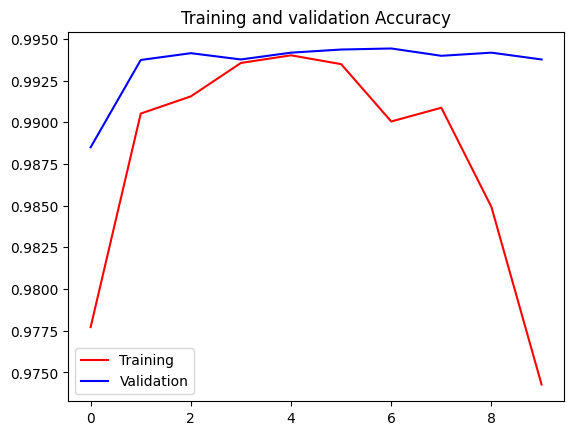

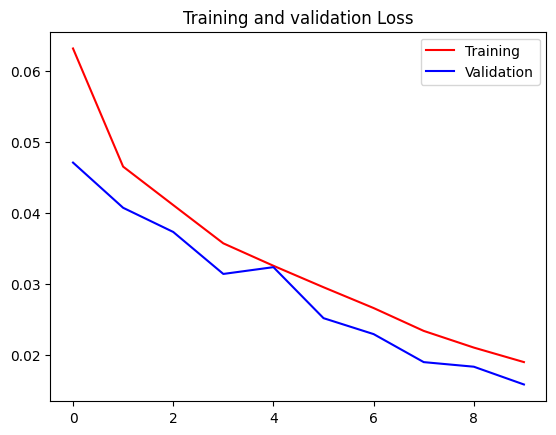

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation Accuracy')
plt.legend(labels = ['Training', 'Validation'])
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation Loss')
plt.legend(labels = ['Training', 'Validation'])
plt.show()

## Evaluating the Model

In [17]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 0s 54ms/step
Precision: 0.920922577381134, Recall:0.9239669442176819, Accuracy:0.5346038341522217


## Making Predictions

In [42]:
test_comments = test_df['comment_text'].values
input_text = vectorizer(test_comments)

In [43]:
result = model.predict(input_text)
test_pred = pd.DataFrame({df.columns[1]: test_comments,
                            df.columns[2]: result[:, 0],
                            df.columns[3]: result[:, 1],
                            df.columns[4]: result[:, 2],
                            df.columns[5]: result[:, 3],
                            df.columns[6]: result[:, 4],
                            df.columns[7]: result[:, 5]
                            })
test_pred.head()


4787/4787 [==============================] - 188s 39ms/step


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Yo bitch Ja Rule is more succesful then you'll...,9.939967e-01,2.715150e-01,9.796912e-01,3.237524e-01,9.381393e-01,5.071905e-01
1,== From RfC == \n\n The title is fine as it is...,7.223788e-05,1.819186e-21,1.765826e-06,5.093776e-11,3.203034e-08,6.955106e-11
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",3.545007e-02,2.360238e-08,6.176258e-03,7.793900e-05,2.460412e-03,3.711093e-05
3,":If you have a look back at the source, the in...",7.664109e-08,7.661103e-37,1.153741e-10,1.002420e-18,2.448996e-14,1.494109e-18
4,I don't anonymously edit articles at all.,7.066743e-05,3.601879e-23,4.127886e-07,1.084383e-11,1.499268e-09,4.612852e-12


## Saving the Model

In [ ]:
model.save('models/toxic-comment-model.h5')
vectorizer_file = "models/text-vectorizer.pkl"
# Pickle the config and weights
pickle.dump({'config': vectorizer.get_config(),
             'weights': vectorizer.get_weights()},
            open(vectorizer_file, "wb"))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Saving Predicted Result

In [ ]:
test_pred.to_csv('test_prediction.csv')